In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess


In [3]:
spine1_x=np.load("dyn_spine1/x_final.npy")
spine1_y=np.load("dyn_spine1/y_final.npy")

spine2_x=np.load("dyn_spine2/x_final.npy")
spine2_y=np.load("dyn_spine2/y_final.npy")

spine3_x=np.load("dyn_spine3/x_final.npy")
spine3_y=np.load("dyn_spine3/y_final.npy")



In [4]:
nan_indices = np.isnan(spine2_x)

# Remove NaN values from both spine2_x and spine2_y
spine2_x = spine2_x[~nan_indices]
spine2_y = spine2_y[~nan_indices]


In [5]:
spine1_x,spine2_x,spine3_x

(array([  0,   0,   0, ..., 472, 473, 474]),
 array([  0.,   0.,   0., ..., 488., 489., 490.]),
 array([  0,   0,   0, ..., 894, 895, 896]))

In [6]:
threshold=470
spine_x=[spine1_x[spine1_x<threshold],spine2_x[spine2_x<threshold],spine3_x[spine3_x<threshold]]
spine_y=[spine1_y[spine1_x<threshold],spine2_y[spine2_x<threshold],spine3_y[spine3_x<threshold]]


1880 1880
2052 2052
1880 1880


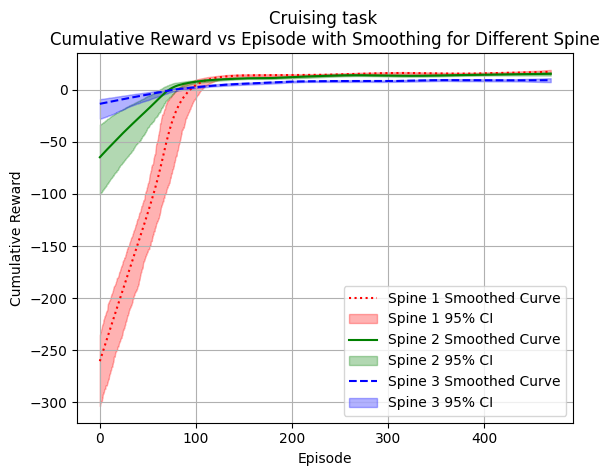

<Figure size 640x480 with 0 Axes>

In [7]:
colors = ["red",'g', 'blue']
labels = ['Spine 1','Spine 2', 'Spine 3']
styles=[":","-",'--']

# Number of bootstrap samples
n_bootstraps = 100

for i in range(3):
    x,y=spine_x[i],spine_y[i]
    # print(len(x),len(y))
    # Storage for bootstrapped smoothed curves
    smoothed_bootstraps = []

    # Generate bootstrapped smoothed curves
    for _ in range(n_bootstraps):
        indices = np.random.choice(len(x), len(x), replace=True)
        bootstrap_x = x[indices]
        bootstrap_y = y[indices]
        smoothed = lowess(bootstrap_y, bootstrap_x, frac=0.3)
        smoothed_bootstraps.append(smoothed)

    # Extract smoothed values from bootstraps
    smoothed_x = np.mean([sb[:, 0] for sb in smoothed_bootstraps], axis=0)
    smoothed_y_mean = np.mean([sb[:, 1] for sb in smoothed_bootstraps], axis=0)

    # Calculate 95% confidence interval
    smoothed_y_bootstraps = np.array([sb[:, 1] for sb in smoothed_bootstraps])
    ci_lower = np.percentile(smoothed_y_bootstraps, 2.5, axis=0)
    ci_upper = np.percentile(smoothed_y_bootstraps, 97.5, axis=0)

    # Plot smoothed line
    plt.plot(smoothed_x, smoothed_y_mean, color=colors[i],linestyle=styles[i], label=f"{labels[i]} Smoothed Curve")
    print(len(smoothed_x),len(smoothed_y_mean))
    # Plot shaded region for confidence interval
    plt.fill_between(smoothed_x, ci_lower, ci_upper, color=colors[i], alpha=0.3, label=f"{labels[i]} 95% CI")

# Add labels, title, grid, and legend
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cruising task \nCumulative Reward vs Episode with Smoothing for Different Spine")
plt.grid(True)
plt.legend()

# Show the plot or save it
plt.show()
plt.savefig("multi_path_smoothed.png")
